In [1]:
from sklearn import datasets
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
mnist = datasets.load_digits()
features, labels = mnist.data, mnist.target
X_train,X_test,y_train,y_test = train_test_split(features, labels, test_size=0.2)

In [4]:
dtree = tree.DecisionTreeClassifier(
criterion="gini", max_depth=8, max_features=32,random_state=35)
dtree = dtree.fit(X_train, y_train)
dtree_predicted = dtree.predict(X_test)

knn = KNeighborsClassifier(n_neighbors=299).fit(X_train, y_train)
knn_predicted = knn.predict(X_test)

svm = SVC(C=0.1, gamma=0.003,
         probability=True,random_state=35).fit(X_train, y_train)
svm_predicted = svm.predict(X_test)


In [7]:
print("[accuarcy]")
print("d-tree: ",accuracy_score(y_test, dtree_predicted))
print("knn   : ",accuracy_score(y_test, knn_predicted))
print("svm   : ",accuracy_score(y_test, svm_predicted))

[accuarcy]
d-tree:  0.7861111111111111
knn   :  0.8166666666666667
svm   :  0.9083333333333333


In [8]:
svm_proba = svm.predict_proba(X_test)
print(svm_proba[0:2])

[[8.69839649e-01 1.08347825e-02 7.55079207e-03 7.80832895e-03
  1.08423280e-02 3.54066196e-02 5.78410421e-03 1.44364268e-02
  2.34301598e-02 1.40668087e-02]
 [9.92445700e-01 7.21939275e-04 5.66274525e-04 5.97888614e-04
  6.16442171e-04 7.43645453e-04 7.17813592e-04 1.05119678e-03
  1.20065555e-03 1.33844387e-03]]


In [9]:
voting_clf = VotingClassifier(estimators=[
    ('decision_tree', dtree), ('knn', knn), ('svm', svm)],
    weights=[1,1,1], voting='hard').fit(X_train, y_train)
hard_voting_predicted = voting_clf.predict(X_test)
accuracy_score(y_test, hard_voting_predicted)

0.8916666666666667

In [12]:
voting_clf = VotingClassifier(estimators=[
    ('decision_tree',dtree),("knn",knn),("svm", svm)],
    weights=[1,1,1], voting='soft').fit(X_train, y_train)
soft_voting_predicted = voting_clf.predict(X_test)
accuracy_score(y_test, soft_voting_predicted)

0.875

([<matplotlib.axis.XTick at 0x1baad54f988>,
 <a list of 5 Text xticklabel objects>)

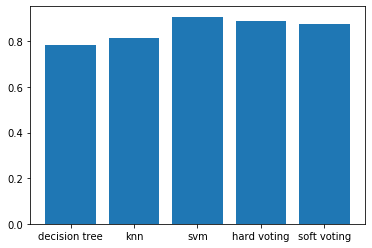

In [13]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

x = np.arange(5)
plt.bar(x, height = [accuracy_score(y_test, dtree_predicted),
                    accuracy_score(y_test, knn_predicted),
                    accuracy_score(y_test, svm_predicted),
                    accuracy_score(y_test, hard_voting_predicted),
                    accuracy_score(y_test, soft_voting_predicted)])
plt.xticks(x, ['decision tree','knn','svm','hard voting','soft voting'])